## Univariate Imputation

In [2]:
import numpy as np
from sklearn.impute import SimpleImputer

# Create an imputer that replaces NaN with the mean
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on data
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])

# Transform a new dataset
X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
print(imp_mean.transform(X))

# Output:
# [[ 7.   2.   3. ]
#  [ 4.   3.5  6. ]
#  [10.   3.5  9. ]]

[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


## Multivariate Imputation

### IterativeImputer

In [3]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Create an IterativeImputer instance
imp_mean = IterativeImputer(random_state=0)

# Fit on the data and transform it
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])

X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
imp_mean.transform(X)

# array([[ 6.95847623,  2.        ,  3.        ],
#        [ 4.        ,  2.6000004 ,  6.        ],
#        [10.        ,  4.99999933,  9.        ]])

array([[ 6.95847623,  2.        ,  3.        ],
       [ 4.        ,  2.6000004 ,  6.        ],
       [10.        ,  4.99999933,  9.        ]])

In [4]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Sample data where column 2 is roughly 2*col_1 + col_3
# Notice the NaN values
X_missing = np.array([
    [1, 3, 1],
    [2, np.nan, 2],
    [3, 7, 3],
    [4, 9, np.nan],
    [5, 12, 5]
])

# Create an IterativeImputer instance
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit on the data and transform it
X_filled = imputer.fit_transform(X_missing)

print("Original Data with Missing Values:")
print(X_missing)
print("\nData after Iterative Imputation:")
print(X_filled)

Original Data with Missing Values:
[[ 1.  3.  1.]
 [ 2. nan  2.]
 [ 3.  7.  3.]
 [ 4.  9. nan]
 [ 5. 12.  5.]]

Data after Iterative Imputation:
[[ 1.          3.          1.        ]
 [ 2.          5.00865974  2.        ]
 [ 3.          7.          3.        ]
 [ 4.          9.          3.99998456]
 [ 5.         12.          5.        ]]


### KNNImputer

In [5]:
import numpy as np
from sklearn.impute import KNNImputer
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

# array([[1. , 2. , 4. ],
#        [3. , 4. , 3. ],
#        [5.5, 6. , 5. ],
#        [8. , 8. , 7. ]])

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [6]:
import numpy as np
from sklearn.impute import KNNImputer

# Sample data with a missing value in the third column
# Let's find the missing value in row 2
X_missing = np.array([
    [1, 10, 100],
    [2, 20, np.nan], # This is the value we want to find
    [4, 40, 400],
    [5, 50, 500]
])

# Create a KNNImputer instance
# We'll look for the 2 nearest neighbors
imputer = KNNImputer(n_neighbors=2)

# Fit on the data and transform it
X_filled = imputer.fit_transform(X_missing)

print("Original Data with Missing Values:")
print(X_missing)
print("\nData after KNN Imputation:")
print(X_filled)
#To impute the missing value, it takes the average of the third column from those two neighbors: (100 + 400) / 2 = 250


Original Data with Missing Values:
[[  1.  10. 100.]
 [  2.  20.  nan]
 [  4.  40. 400.]
 [  5.  50. 500.]]

Data after KNN Imputation:
[[  1.  10. 100.]
 [  2.  20. 250.]
 [  4.  40. 400.]
 [  5.  50. 500.]]


### Feature Selection

In [7]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]]
selector = VarianceThreshold()
selector.fit_transform(X)
# array([[2, 0],
#        [1, 4],
#        [1, 1]])

array([[2, 0],
       [1, 4],
       [1, 1]])

#### Univariate Feature Selection

In [8]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X, y = load_iris(return_X_y=True)
X.shape
#(150, 4)
X_new = SelectKBest(f_classif, k=2).fit_transform(X, y)
X_new.shape
#(150, 2)

(150, 2)

### Recursive feature elimiation (RFE)

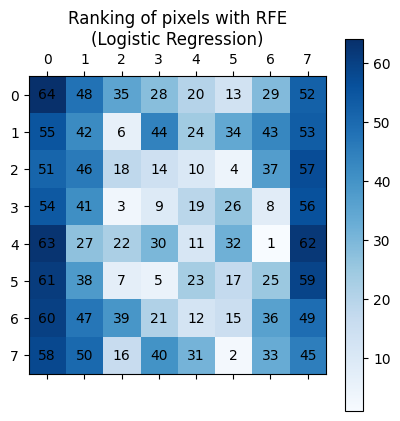

In [9]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# Load the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

pipe = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("rfe", RFE(estimator=LogisticRegression(), n_features_to_select=1, step=1)),
    ]
)

pipe.fit(X, y)
ranking = pipe.named_steps["rfe"].ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)

# Add annotations for pixel numbers
for i in range(ranking.shape[0]):
    for j in range(ranking.shape[1]):
        plt.text(j, i, str(ranking[i, j]), ha="center", va="center", color="black")

plt.colorbar()
plt.title("Ranking of pixels with RFE\n(Logistic Regression)")
plt.show()

In [ ]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10,
random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.support_
selector.ranking_
#array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])

array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])

### Buiding a Pipeline

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Define the sequence of steps
estimators = [
    ('imputer', SimpleImputer(strategy='mean')), # Step 1: Impute missing values
    ('scaler', StandardScaler()),                 # Step 2: Scale features
    ('clf', SVC(kernel='rbf'))                    # Step 3: Train a classifier
]

# Create the pipeline
pipe = Pipeline(estimators)

# Now, you can use 'pipe' just like any other scikit-learn estimator
#pipe.fit(X_train, y_train)
pipe.fit(X, y)
#accuracy = pipe.score(X_test, y_test)
#accuracy = pipe.score(X, y) #0.996661101836394


,steps,"[('imputer', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True
